In [1]:
import pandas as pd
restricted_df = pd.read_csv("../data/income-restricted-inventory-2021.csv")

In [2]:
restricted_df.head()
# Add up all income_restricted units for a neighborhood
# compare total hazardous cinditions violations to 
total_restricted = restricted_df.groupby(['Neighborhood'])['Total Income-Restricted'].sum()

total_restricted = total_restricted.reset_index()
total_restricted['Location'] = total_restricted.apply(lambda x: str(x['Neighborhood']).lower().replace(' ', ''), axis = 1)




In [3]:
cities_df = pd.read_csv("../data/cities_df.csv")
cities_df.head()

,Unnamed: 0,Location,Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total
0,1,dorchester,29.0,3.0,41.0,32.0,0.0,1.0,7.0,181.0,294.0
1,0,boston,30.0,1.0,45.0,40.0,0.0,0.0,2.0,121.0,239.0
2,2,roxbury,15.0,0.0,17.0,12.0,0.0,0.0,1.0,43.0,88.0
3,4,mattapan,10.0,0.0,10.0,5.0,1.0,0.0,4.0,33.0,63.0
4,3,jamaicaplain,10.0,1.0,14.0,7.0,0.0,0.0,3.0,27.0,62.0


In [4]:
new_df = pd.merge(cities_df, total_restricted, how = 'inner', on = 'Location')
#new_df['Neighborhood'] = new_df['Neighborhood'].fillna("None")
#new_df['Total Income-Restricted'] = new_df['Total Income-Restricted'].fillna(0)
#filtered_df = new_df.dropna()

new_df

#filtered_df I NEED to think about this, I'm not totally sure what it all means lol
#could just do a natural join so we only have ones where we have data (bc there are a lot of neighborhood with no income-restricted housing)

,Unnamed: 0,Location,Hot Water,Potable Water,Heating Facilities Required,Temperature Requirements,Asbestos Material,Use of Lead Paint Prohibited,Safe Condition,Smoke Detectors and Carbon Monoxide Alarms,Total,Neighborhood,Total Income-Restricted
0,1,dorchester,29.0,3.0,41.0,32.0,0.0,1.0,7.0,181.0,294.0,Dorchester,8607
1,2,roxbury,15.0,0.0,17.0,12.0,0.0,0.0,1.0,43.0,88.0,Roxbury,10850
2,4,mattapan,10.0,0.0,10.0,5.0,1.0,0.0,4.0,33.0,63.0,Mattapan,1641
3,3,jamaicaplain,10.0,1.0,14.0,7.0,0.0,0.0,3.0,27.0,62.0,Jamaica Plain,4001
4,18,southboston,2.0,0.0,21.0,9.0,0.0,0.0,1.0,26.0,59.0,South Boston,3389
5,5,hydepark,6.0,1.0,2.0,1.0,0.0,1.0,3.0,38.0,52.0,Hyde Park,905
6,6,eastboston,5.0,0.0,8.0,2.0,0.0,0.0,3.0,20.0,38.0,East Boston,2761
7,16,brighton,2.0,0.0,3.0,8.0,0.0,0.0,0.0,19.0,32.0,Brighton,3412
8,7,roslindale,4.0,0.0,3.0,5.0,0.0,0.0,1.0,17.0,30.0,Roslindale,1401
9,36,allston,1.0,0.0,2.0,5.0,0.0,0.0,1.0,14.0,23.0,Allston,931


/Users/isa/Library/Python/3.8/lib/python/site-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


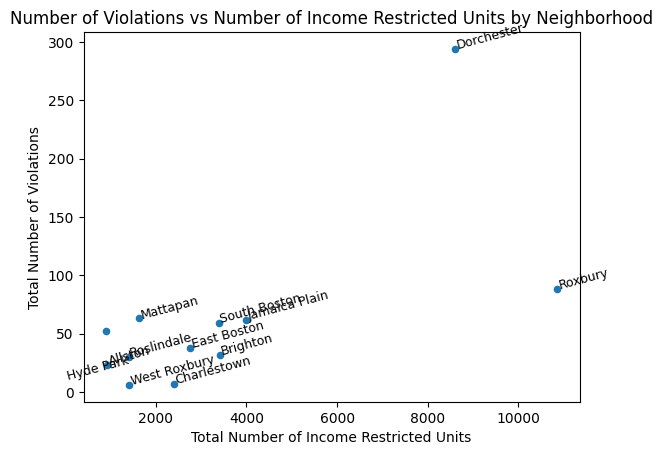

In [5]:
import matplotlib.pyplot as plt
new_df.plot.scatter(x='Total Income-Restricted', y='Total', colormap='viridis')
plt.title("Number of Violations vs Number of Income Restricted Units by Neighborhood")
plt.xlabel("Total Number of Income Restricted Units")
plt.ylabel("Total Number of Violations")


for i, txt in enumerate(new_df['Neighborhood']):
    if txt == 'Hyde Park':
        plt.annotate(txt, (new_df.iat[i, 12], new_df.iat[i, 10]),  xytext=(10, 10), fontsize = 9, ha = 'left',rotation = 15)
    else:
        plt.annotate(txt, (new_df.iat[i, 12], new_df.iat[i, 10]), fontsize = 9, ha = 'left',rotation = 15)


plt.show()


In [7]:
new_df.iat[0, 12]

8607

- Did a natural join so that we are only looking at cities that have income-restricted units AND have violations
- Obviously, there are many other markers of vulnerability
- This doesn't show a strong correlation at all but the places with the most income restricted units do generally have the most violations